# $f(x,y) = x^2y$

* Condition for $\alpha-MVI$ : $x^2y+ 2\alpha(x^4+4x^2y^2) \geq 0$

* Region where $\alpha-MVI$ is not satisfied shrinks as $\alpha$ increases

In [35]:
ls

 Volume in drive C is OS
 Volume Serial Number is CC98-4224

 Directory of C:\Users\Abhijeet Vyas

29-10-2022  18:18    <DIR>          .
27-06-2022  17:12    <DIR>          ..
29-05-2021  06:37    <DIR>          .aws
04-06-2021  05:36             3,099 .bash_history
21-08-2021  13:29    <DIR>          .cisco
19-01-2020  03:09    <DIR>          .conda
29-04-2021  06:10                52 .gitconfig
27-10-2022  01:09    <DIR>          .ipynb_checkpoints
19-01-2020  03:47    <DIR>          .ipython
19-01-2020  03:48    <DIR>          .jupyter
19-01-2020  03:57    <DIR>          .matplotlib
11-07-2022  14:26    <DIR>          .ms-ad
29-04-2021  08:10               898 .viminfo
26-05-2022  09:10            30,105 1cgdpxay0.pdf
26-05-2022  09:10            29,761 1cgdpxay1.pdf
26-05-2022  09:10            29,868 1cgdpxay2.pdf
26-05-2022  09:10            29,474 1cgdpxay3.pdf
26-05-2022  09:10            29,731 1cgdpxay4.pdf
26-05-2022  09:10            31,826 1cgdpxay5.pdf
26-05-2022  09:10  

In [2]:
import matplotlib.pyplot as plt

In [3]:
from matplotlib import patches

In [4]:
import numpy as np

In [5]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [6]:
def oracle(x,y,a):
    gx = 2*x*y
    gy = x*x
    gxy = 2*x
    gax = (gx+a*gxy*gy)/(1+a**2)
    gay = (-gy+a*gxy*gx)/(1+a**2)
    return([gx,gy,gax,gay])

In [7]:
def SimGD(x,y,n):
    xs = []
    ys = []
    x=x
    y=y
    k=2
    a= 0
    for i in range(300):
        [gx,gy,gax,gay] = oracle(x,y,a)
        y = y-n*gy
        x = x-n*gx
        xs.append(x)
        ys.append(y)
    return([xs,ys])

In [8]:
def CGD_plus(x,y,a,n):
    xs = [x]
    ys = [y]
    a = a
    for i in range(500):
        #x-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        y = y-n*gay
        x = x-n*gax
        xs.append(x)
        ys.append(y)
    return([xs,ys])

In [9]:
def Alt_CGD_plus(x,y,a,n):
    xs = []
    ys = []
    x=x
    y=y
    a = a
    for i in range(100):

        #x-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        x = x-n*gax
        #y-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        y = y-n*gay
        if x<= -1.0/3:
            x=-1.0/3
        xs.append(x)
        ys.append(y)
    return([xs,ys])

In [10]:
def OptCGD_plus(x,y,a,n):
    xs = [x]
    ys = [y]
    x=x
    y=y
    a = a
    for i in range(500):
        x_temp = x
        y_temp = y
        
        #x-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        x = x-n*gax
        y = y-n*gay
        #y-update
        [gx,gy,gax,gay] = oracle(x,y,a)
        x = x_temp-n*gax
        y = y_temp-n*gay        
        xs.append(x)
        ys.append(y)
    return([xs,ys])

In [11]:
def plot_negative_gradients(a=0) -> None:
    fig, ax = plt.subplots(figsize=(10, 10))
    k=2
    x, y = np.mgrid[-5:5:20j, -5:5:20j]
    gx = k*x-y
    gy = -k*y-x
    gxy = -1
    gax = (gx+a*gxy*gy)/(1+a**2)
    gay = (gy-a*gxy*gx)/(1+a**2)    
    
    norm = np.linalg.norm(np.stack([gx, gy], axis=0), axis=0)
    plt.quiver(x, y, -gax, gay, norm, width=0.002,scale = 100)

    rect = patches.Rectangle((-1, -0.1), 2, 0.2, linewidth=2, edgecolor="r", facecolor="none")
#     ax.add_patch(rect)

    plt.xlabel(r"$x$",fontsize=40)
    plt.ylabel(r"$y$",fontsize=40)
#     plt.title("$-∇f(x, y) = -8y+6sin(x)^2sin(y)cos(y)-20sin(y)cos(y)$")
    plt.xticks(range(-5, 6),size = 20)
    plt.yticks(range(-5, 6),size = 20)
    plt.axis("equal")
    plt.tight_layout()

#     plt.savefig("out/negative_gradients_1.png")
#     plt.close()


## CGO

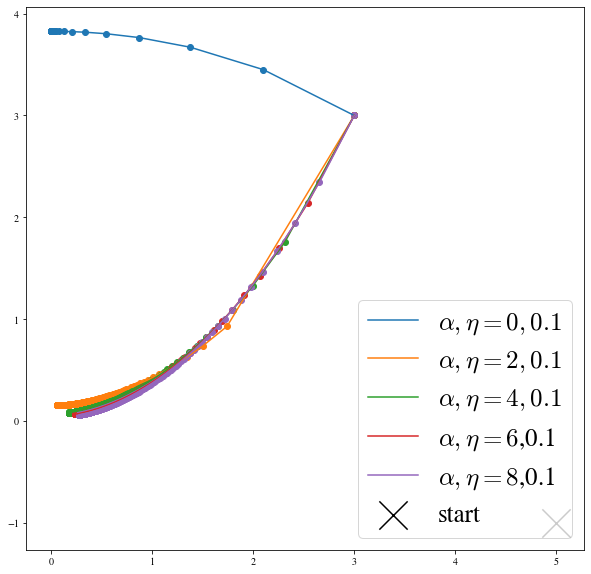

In [26]:
# plot_negative_gradients()
plt.figure(figsize=(10,10))
plt.scatter(5,-1,marker='x',c='black',s=800)

for i in range(0,5):
    if i<=0:
        a,b = CGD_plus(3,3,(i),0.05)
    else:
        a,b = CGD_plus(3,3,(2*i),0.05)
    plt.scatter(a,b)
    plt.plot(a,b)
#     print(a[-1]**2+b[-1]**2)
hfont = {'fontname':'Times New Roman'}
# plt.xlabel("x",fontsize = 40,**hfont)
# plt.ylabel("y",fontsize = 40,**hfont)
plt.legend([r"$\alpha,\eta=0,0.1$", r"$\alpha,\eta=2,0.1$",r"$\alpha,\eta=4,0.1$",r"$\alpha,\eta=6$,0.1", r"$\alpha,\eta=8$,0.1","start"], loc ="lower right",prop={'size': 25})
plt.savefig('cgdp+f.pdf', format='pdf')

# oCGO

0
1
2
3
4
5


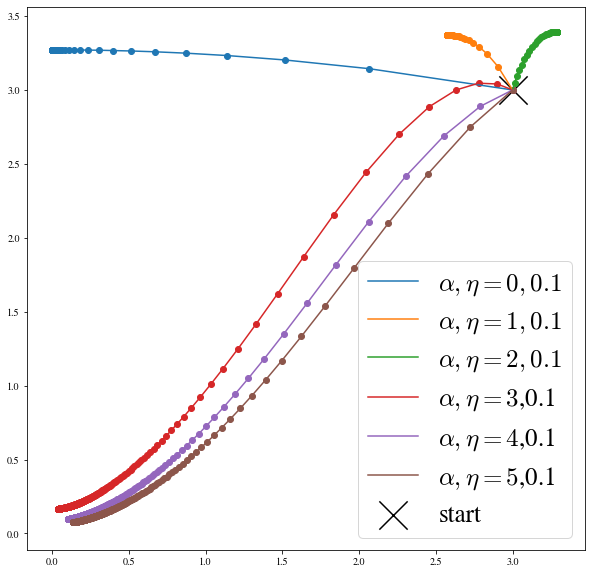

In [34]:
plt.figure(figsize=(10.,10))
plt.scatter(3,3,marker='x',c='black',s=800)

for i in range(0,6):
    if i<=0:
        a,b = OptCGD_plus(3,3,(i),0.1)
    else:
        a,b = OptCGD_plus(3,3,(i),0.1)
    print((i))
    plt.scatter(a,b)
    plt.plot(a,b)
    
# plt.scatter(3,3,marker='x',c='black',s=800)
# plt.scatter(3,3,marker='x',c='black',s=800)

plt.legend([r"$\alpha,\eta=0,0.1$", r"$\alpha,\eta=1,0.1$",r"$\alpha,\eta=2,0.1$",r"$\alpha,\eta=3$,0.1", r"$\alpha,\eta=4$,0.1",r"$\alpha,\eta=5$,0.1","start"], loc ="lower right",prop={'size': 25})
plt.savefig('ocgdp+f.pdf', format='pdf')